### IMPORTING USEFUL LIBRARIES FOR OUR ANALYSIS

In [4]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(101)

## IMPORTING MARKETING CAMPAIGN DATASET

In [6]:
path=r"C:\Users\Nagar\Documents\marketing_campaign.csv"

In [7]:
df=pd.read_csv(path,delimiter='\t')

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Exploratory data analysis

This is really an important session on the analysis, to explore our dataset,Here we will apply some data visualization and data exploration techniques in order to gain insights from data. We will propose some questions to be answeared with coding steps.

In [9]:
df.shape

(2240, 29)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* There are a total of 27 columns and 2,240 rows in the dataset
* We can see that the Income column has less than 2,240 non-null values i.e. column has missing values.
* Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
* There are some categorical features in our data frame, as there are some features in dtype: object. So we will need to encode  them into numeric forms later.

In [11]:
## missing values

In [12]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## inclome column has 24 missing values

# TO CHECK UNIQUE ID COUNTS

In [13]:
id=df["ID"].value_counts()

In [14]:
id.value_counts()

1    2240
Name: ID, dtype: int64

In [15]:
## THERE ARE 2240 UNIQUE ID COUNTS WE HAVE

### First of all, for the missing values, I am simply going to drop the rows that have missing income values.

In [16]:
df=df.dropna()

In [17]:
df.shape

(2216, 29)

## Convert Dt_Customer To Datetime Format

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

## I will be performing the following steps to engineer some new features:



* Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
* Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
* Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating "Family_Size"
* Create a feature "Is_Parent" to indicate parenthood status
* Lastly, I will create three categories in the "Education" by simplifying its value counts.
* Dropping some of the redundant features

## Feature Engineering

In [19]:
#Age of customer today 
df["Age"] = 2021-df["Year_Birth"]

In [20]:
#Total spendings on multiple items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]


In [21]:
#living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [22]:
#total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [23]:
#total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]


In [24]:
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)


In [25]:
#diving education levels in 3 groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [26]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [27]:
#Dropping some of the features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [28]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,2525.000000,3.000000,5.000000,1.000000


In [29]:
## FEW OUTLIERS IN INCOME AND AGE

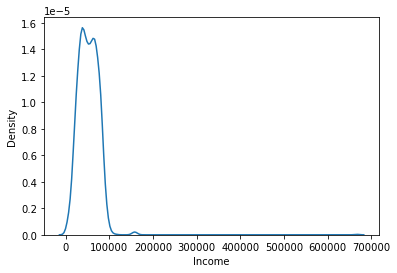

In [31]:
sns.kdeplot(df['Income']);

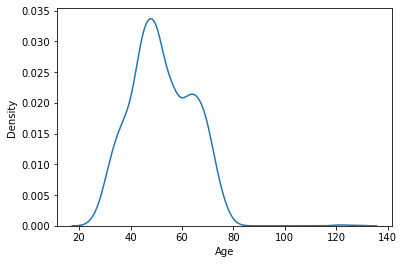

In [32]:
sns.kdeplot(df['Age']);

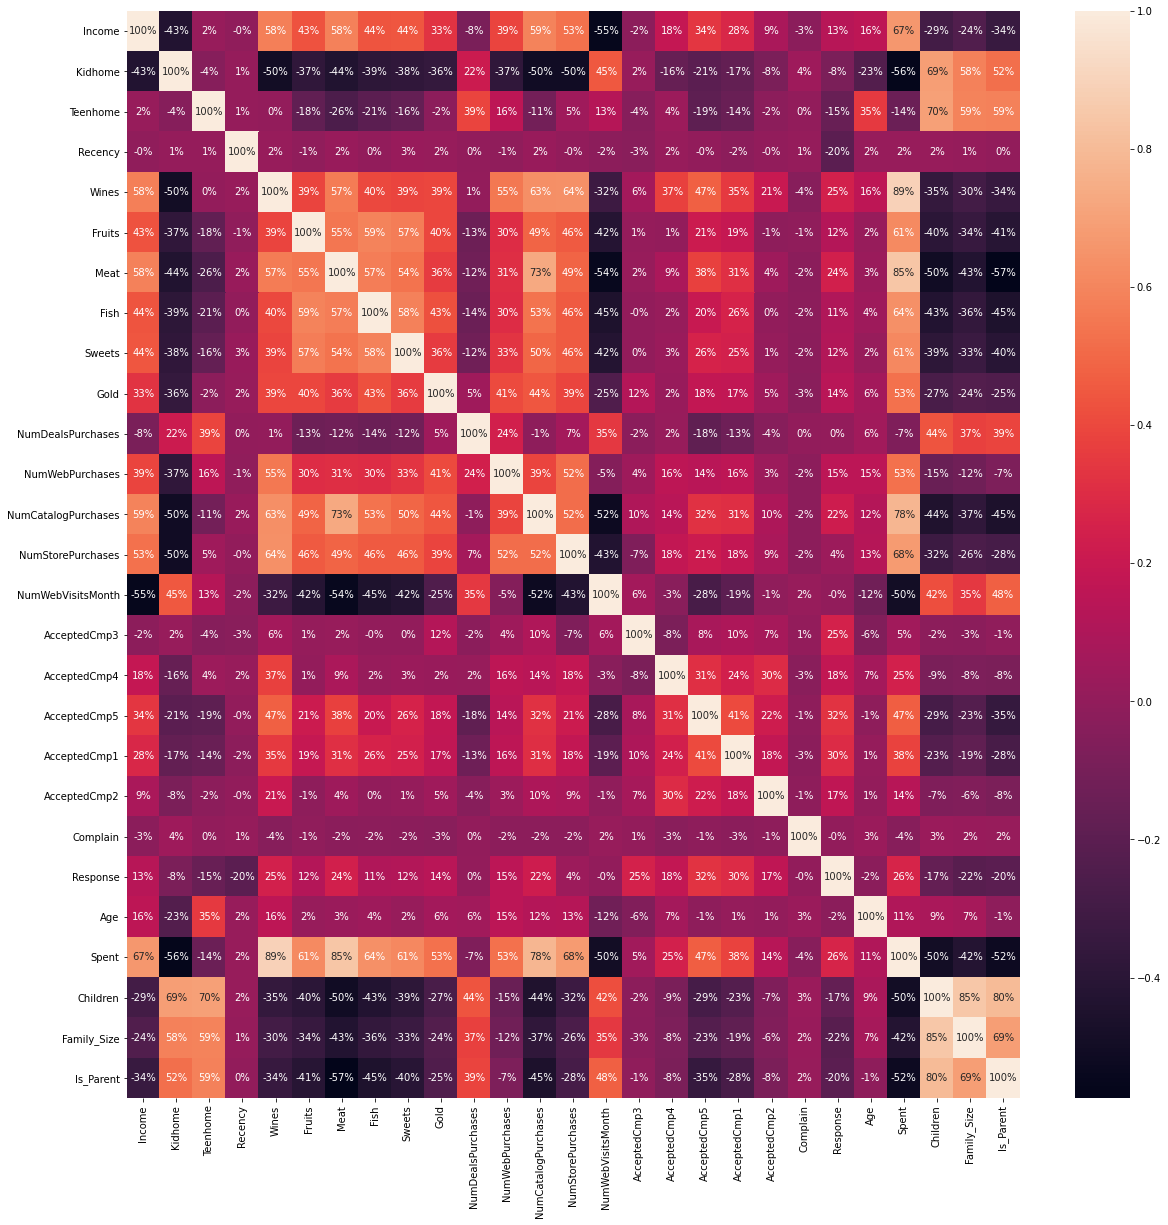

In [33]:
corr= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr,annot=True,fmt='.0%');

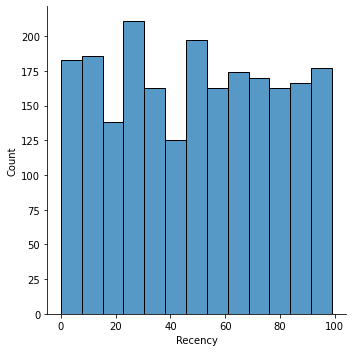

In [34]:
sns.displot(df['Recency']);

## let's start pre-processing the data

In [35]:
#categorical variables
obj= (df.dtypes == 'object')
objcols= list(obj[obj].index)
objcols


['Education', 'Living_With']

In [36]:
df["Education"].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

## Label encoding the categorical features

In [37]:
#Label Encoding ,data type=object
encode=LabelEncoder()
for i in objcols:
    df[i]=df[[i]].apply(encode.fit_transform)

In [38]:
df["Education"].unique()

array([0, 1, 2])

In [39]:
df["Living_With"].unique()

array([0, 1])

In [40]:
## categorical values converted to numerical values

In [41]:
#Creating a copy of data
d1 = df.copy()

In [42]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
coldel = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
d1 = d1.drop(coldel, axis=1)

## Scaling the data

In [43]:
scaler = StandardScaler()
scaler.fit(d1)
scaled_d1 = pd.DataFrame(scaler.transform(d1),columns= d1.columns )

In [44]:
d1.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.611011,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,4.085289,2.671029,5.800993,5.319043,52.179603,607.075361,0.645307,0.947202,2.592509,0.714350
std,0.683469,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.740951,2.926734,3.250785,2.425359,11.985554,602.900476,0.478528,0.749062,0.905722,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,2.000000,0.000000,3.000000,3.000000,44.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,4.000000,2.000000,5.000000,6.000000,51.000000,396.500000,1.000000,1.000000,3.000000,1.000000
75%,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,6.000000,4.000000,8.000000,7.000000,62.000000,1048.000000,1.000000,1.000000,3.000000,1.000000
max,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,27.000000,28.000000,13.000000,20.000000,128.000000,2525.000000,1.000000,3.000000,5.000000,1.000000



## DIMENSIONALITY REDUCTION

### Many of these features are correlated with each other, means they will impact the clusters/target in the same manner
### I will be performing dimensionality reduction on the  features

Dimensionality reduction with PCA,
I will be reducing the dimensions to 3.

In [45]:
pca = PCA(n_components=3)
pca.fit(scaled_d1)
PCA_d1 = pd.DataFrame(pca.transform(scaled_d1), columns=(["col1","col2", "col3"]))
PCA_d1.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-6.372760e-17,2.848682,-5.843091,-2.497235,-0.800306,2.398025,7.347915
col2,2216.0,1.064131e-16,1.691218,-4.246269,-1.317269,-0.139415,1.228177,6.083165
col3,2216.0,-3.907825e-17,1.154379,-2.954138,-0.898290,-0.123600,0.809860,3.793822


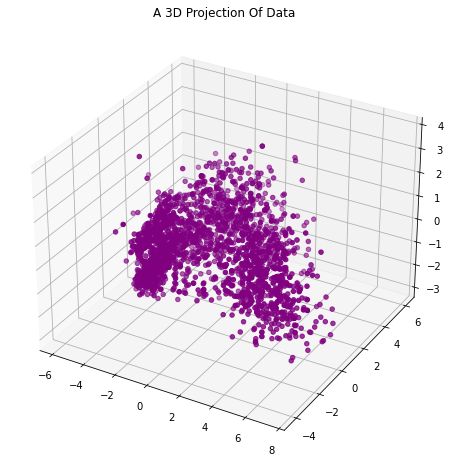

In [46]:
#A 3D Projection Of Data 
x =PCA_d1["col1"]
y =PCA_d1["col2"]
z =PCA_d1["col3"]
#To plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="purple", marker="o" )
ax.set_title("A 3D Projection Of Data")
plt.show()

<AxesSubplot:xlabel='Kidhome', ylabel='count'>

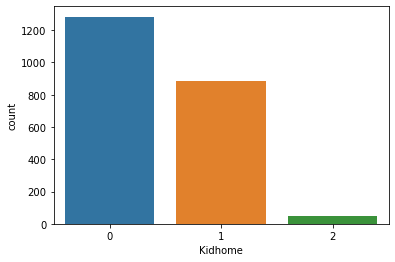

In [47]:
sns.countplot(d1['Kidhome'])

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

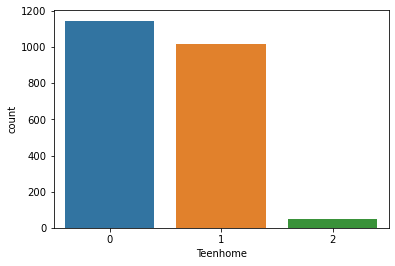

In [48]:
sns.countplot(d1['Teenhome'])

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='count'>

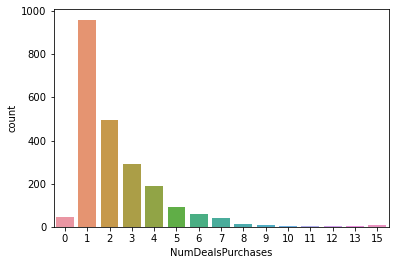

In [49]:
sns.countplot(d1['NumDealsPurchases'])

# Clustering the data

From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our campaigns do in the past.

In [51]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS, Isomap
df1 = df.copy()
numcol = ['Income', 'Age', 'NumDealsPurchases', 'NumWebVisitsMonth']
catcol = ['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']

In [52]:
df1.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [53]:
df1['Accepted'] = df1[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1) > 0
df1['Accepted'] = df1['Accepted'].apply(lambda row: 1 if row else 0)

df1.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1, inplace=True)

df1

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Accepted
0,0,58138.0,0,0,58,635,88,546,172,88,...,4,7,0,64,1617,0,0,1,0,1
1,0,46344.0,1,1,38,11,1,6,2,1,...,2,5,0,67,27,0,2,3,1,0
2,0,71613.0,0,0,26,426,49,127,111,21,...,10,4,0,56,776,1,0,2,0,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,4,6,0,37,53,1,1,3,1,0
4,1,58293.0,1,0,94,173,43,118,46,27,...,6,5,0,40,422,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,4,5,0,54,1341,1,1,3,1,0
2236,1,64014.0,2,1,56,406,0,30,0,0,...,5,7,0,75,444,1,3,5,1,1
2237,0,56981.0,0,0,91,908,48,217,32,12,...,13,6,0,40,1241,0,0,1,0,1
2238,1,69245.0,0,1,8,428,30,214,80,30,...,10,3,0,65,843,1,1,3,1,0


In [54]:
df1 = pd.DataFrame(StandardScaler().fit_transform(df1), columns=df1.columns)

In [55]:
for i in df1.columns:
    df1[i].astype(dtype=float)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   float64
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   float64
 3   Teenhome             2216 non-null   float64
 4   Recency              2216 non-null   float64
 5   Wines                2216 non-null   float64
 6   Fruits               2216 non-null   float64
 7   Meat                 2216 non-null   float64
 8   Fish                 2216 non-null   float64
 9   Sweets               2216 non-null   float64
 10  Gold                 2216 non-null   float64
 11  NumDealsPurchases    2216 non-null   float64
 12  NumWebPurchases      2216 non-null   float64
 13  NumCatalogPurchases  2216 non-null   float64
 14  NumStorePurchases    2216 non-null   float64
 15  NumWebVisitsMonth    2216 non-null   f

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,0,1,2,3,4,5,6,7,8,9
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,5.142469,-0.309157,1.698100,-0.919340,1.085990,0.442243,0.002514,-0.659547,-0.005460,-2.159318
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-2.908674,0.136435,0.033009,1.518500,0.979206,0.883429,-1.347311,-0.601192,-0.918888,-0.443970
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,2.487672,-0.720467,-0.471747,0.334380,-0.265219,0.050548,-0.493882,0.598989,1.902186,0.644024
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-2.607731,-1.329778,-0.753730,-1.234085,-0.031967,0.391168,-0.743027,-0.024830,0.730009,0.774810
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.730679,0.269518,-0.970989,-1.477164,0.604938,-1.156545,1.315997,-0.024479,-0.557209,0.571001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.894187,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,2.201687,2.435565,-0.322644,-0.656039,1.032071,-0.454341,-0.362328,0.529371,2.009090,-1.311874
2212,0.569268,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,-2.914452,4.250117,0.375135,-1.077041,-1.343137,0.583704,0.500292,-0.973334,-1.558867,-1.339715
2213,-0.894187,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,2.905177,-1.717178,1.783419,-0.182409,0.393277,-0.153027,0.802913,-1.899133,-0.079802,1.221981
2214,0.569268,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,1.367634,1.795094,-0.759441,1.155816,-0.955725,0.091105,-0.791482,1.400432,0.224704,0.386406


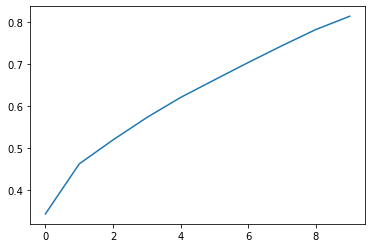

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pdata = pd.DataFrame(pca.fit_transform(df1))
plt.plot(pca.explained_variance_ratio_.cumsum())
df1 = pd.concat([df1, pdata], axis=1)
df1

In [57]:
t = TSNE(learning_rate=50)
t_result = df1.copy()
t_result[['TSNE1', 'TSNE2']] = pd.DataFrame(t.fit_transform(df1[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]), columns=['TSNE1', 'TSNE2'])
t_result

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,2,3,4,5,6,7,8,9,TSNE1,TSNE2
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,1.698100,-0.919340,1.085990,0.442243,0.002514,-0.659547,-0.005460,-2.159318,22.399078,50.099625
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,0.033009,1.518500,0.979206,0.883429,-1.347311,-0.601192,-0.918888,-0.443970,-45.734585,-3.670776
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.471747,0.334380,-0.265219,0.050548,-0.493882,0.598989,1.902186,0.644024,48.830490,6.947573
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.753730,-1.234085,-0.031967,0.391168,-0.743027,-0.024830,0.730009,0.774810,-2.937376,-55.180592
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.970989,-1.477164,0.604938,-1.156545,1.315997,-0.024479,-0.557209,0.571001,12.809760,-34.179947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.894187,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,-0.322644,-0.656039,1.032071,-0.454341,-0.362328,0.529371,2.009090,-1.311874,1.565771,13.987480
2212,0.569268,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,0.375135,-1.077041,-1.343137,0.583704,0.500292,-0.973334,-1.558867,-1.339715,-29.001917,-17.751034
2213,-0.894187,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,1.783419,-0.182409,0.393277,-0.153027,0.802913,-1.899133,-0.079802,1.221981,17.699606,36.952690
2214,0.569268,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,-0.759441,1.155816,-0.955725,0.091105,-0.791482,1.400432,0.224704,0.386406,3.998939,3.754193


<AxesSubplot:xlabel='TSNE1', ylabel='TSNE2'>

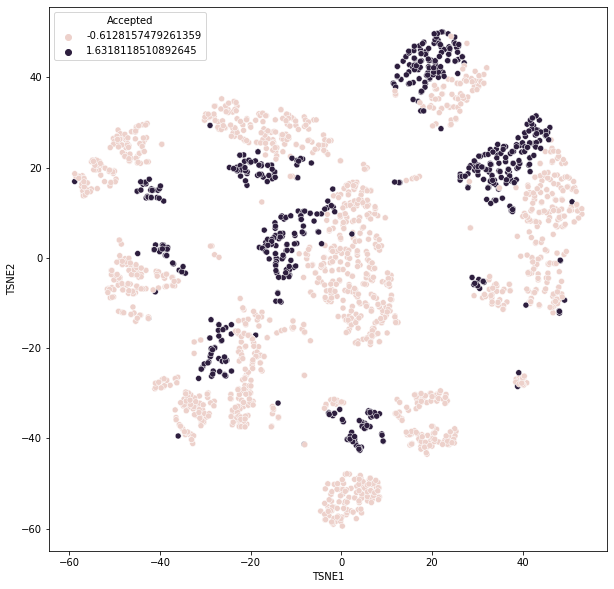

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Accepted', data=t_result)

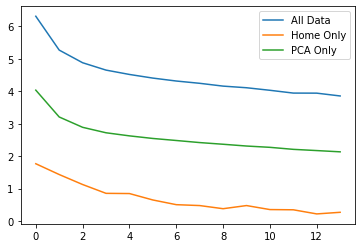

In [59]:
from scipy.cluster.vq import kmeans, vq
import random
random.seed(1000)

# All Data
clusterdata = df1.copy()

distortions = []
for k in range(1, 15):
    _, distortion = kmeans(clusterdata, k)
    distortions.append(distortion)
    
plt.plot(distortions, label='All Data')

# Some Meaningful only
clusterdata = df1.copy()[[
    'Kidhome', 'Teenhome', 'Complain', 'Accepted'
]]

distortions = []
for k in range(1, 15):
    _, distortion = kmeans(clusterdata, k)
    distortions.append(distortion)
    
plt.plot(distortions, label='Home Only')

# PCA 
clusterdata = df1.copy()[[
    0, 1, 2, 3, 4, 5, 6, 7
]]

distortions = []
for k in range(1, 15):
    _, distortion = kmeans(clusterdata, k)
    distortions.append(distortion)
    
plt.plot(distortions, label='PCA Only')




plt.legend()

<AxesSubplot:xlabel='TSNE1', ylabel='TSNE2'>

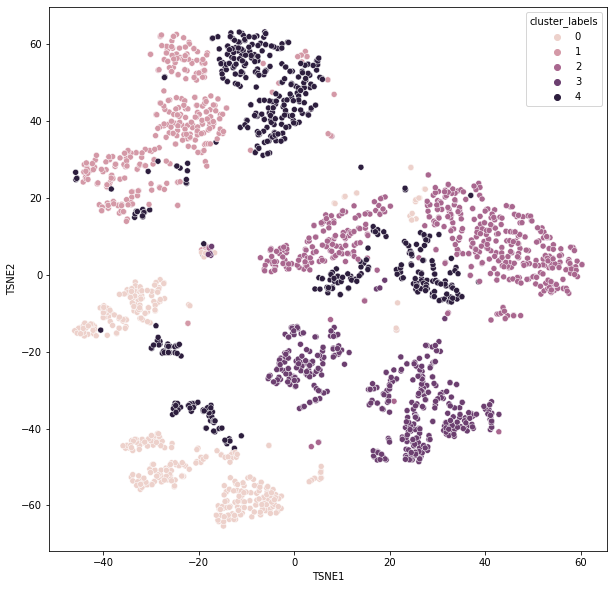

In [60]:
random.seed(500)

clusterdata =df1.copy()[['Kidhome', 'Teenhome', 'Complain', 'Accepted']]

clustercenters, _ = kmeans(clusterdata, 5)

clusterdata['cluster_labels'], _ = vq(clusterdata, clustercenters)

tsne = TSNE(learning_rate=100)

tsne_results = clusterdata.copy()

tsne_results[['TSNE1', 'TSNE2']] = pd.DataFrame(tsne.fit_transform(df1), columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(10,10))

sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster_labels', cmap=sns.color_palette(), data=tsne_results)

# CONCLUSION

We see that the clustering with just 4 Features is quite amazing. 
I suggest for a better performing model to be put in an sklearn pipeline with just
the Kidhome, Teenhome, Complain, and Accepted Features.
THEN
I did use dimensionality reduction followed by agglomerative clustering. 
I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. 
This can be used in planning better marketing strategies.

# CLASSIFICATION MODEL

### i will take the cleaned,pre-processed data(from clustering process)

In [64]:
df_c=df1.copy()

In [66]:
df_c.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,0,1,2,3,4,5,6,7,8,9
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,5.142469,-0.309157,1.698100,-0.919340,1.085990,0.442243,0.002514,-0.659547,-0.005460,-2.159318
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-2.908674,0.136435,0.033009,1.518500,0.979206,0.883429,-1.347311,-0.601192,-0.918888,-0.443970
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,2.487672,-0.720467,-0.471747,0.334380,-0.265219,0.050548,-0.493882,0.598989,1.902186,0.644024
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-2.607731,-1.329778,-0.753730,-1.234085,-0.031967,0.391168,-0.743027,-0.024830,0.730009,0.774810
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.730679,0.269518,-0.970989,-1.477164,0.604938,-1.156545,1.315997,-0.024479,-0.557209,0.571001


In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [70]:
df_c.isna().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Age                    0
Spent                  0
Living_With            0
Children               0
Family_Size            0
Is_Parent              0
Accepted               0
0                      0
1                      0
2                      0
3                      0
4                      0
5                      0
6                      0
7                      0
8                      0
9                      0
dtype: int64

In [71]:
df_c.shape

(2216, 34)

In [72]:
df_c.columns

Index([          'Education',              'Income',             'Kidhome',
                  'Teenhome',             'Recency',               'Wines',
                    'Fruits',                'Meat',                'Fish',
                    'Sweets',                'Gold',   'NumDealsPurchases',
           'NumWebPurchases', 'NumCatalogPurchases',   'NumStorePurchases',
         'NumWebVisitsMonth',            'Complain',                 'Age',
                     'Spent',         'Living_With',            'Children',
               'Family_Size',           'Is_Parent',            'Accepted',
                           0,                     1,                     2,
                           3,                     4,                     5,
                           6,                     7,                     8,
                           9],
      dtype='object')

# selecting features and target

In [74]:
features=pd.DataFrame(df_c[[0,1,2,3,4,5,6,7,8,9]])

In [75]:
features.shape

(2216, 10)

In [76]:
target=pd.DataFrame(df["Response"])

In [77]:
target.shape

(2216, 1)

## splitting into test and train

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
xtr,xts,ytr,yts=train_test_split(features,target,random_state=101,test_size=0.3)

In [80]:
xtr.shape,xts.shape,ytr.shape,yts.shape

((1551, 10), (665, 10), (1551, 1), (665, 1))

In [81]:
from sklearn import linear_model,metrics

In [82]:
reg=linear_model.LogisticRegression(solver='liblinear')

In [83]:
reg.fit(xtr,ytr)

LogisticRegression(solver='liblinear')

In [84]:
ypred1=reg.predict(xts)

In [85]:
acc1=metrics.accuracy_score(yts,ypred1)
acc1

0.9187969924812031

In [86]:
print(metrics.confusion_matrix(ypred1,yts))

[[534  28]
 [ 26  77]]


In [87]:
print(metrics.classification_report(yts,ypred1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       560
           1       0.75      0.73      0.74       105

    accuracy                           0.92       665
   macro avg       0.85      0.84      0.85       665
weighted avg       0.92      0.92      0.92       665



In [88]:
import xgboost as xgb

In [89]:
from xgboost import XGBClassifier


In [90]:
xgb=XGBClassifier(booster='gbtree',learning_ratio=0.5,silent=1)


In [91]:
xgb.fit(xtr,ytr)

[10:56:48] WARNING: ..\src\learner.cc:541: 
Parameters: { learning_ratio, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:56:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, learning_ratio=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, silent=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [92]:
ypred2=xgb.predict(xts)

In [94]:
acc2=metrics.accuracy_score(ypred2,yts)
acc2

0.9263157894736842

In [95]:
print(metrics.classification_report(yts,ypred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       560
           1       0.79      0.72      0.76       105

    accuracy                           0.93       665
   macro avg       0.87      0.84      0.86       665
weighted avg       0.92      0.93      0.92       665



### after comparing the above two models(logistic and xgboost classifier), xgboost is giving better accuracy.